In [5]:

pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')
import warnings
warnings.simplefilter("ignore")
#from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [7]:
bmi =pd.read_csv('bmi.csv')

In [9]:
bmi.shape

(500, 4)

In [10]:
bmi.info

<bound method DataFrame.info of      Gender  Height  Weight  Index
0      Male     174      96      4
1      Male     189      87      2
2    Female     185     110      4
3    Female     195     104      3
4      Male     149      61      3
..      ...     ...     ...    ...
495  Female     150     153      5
496  Female     184     121      4
497  Female     141     136      5
498    Male     150      95      5
499    Male     173     131      5

[500 rows x 4 columns]>

In [11]:
bmi.describe

<bound method NDFrame.describe of      Gender  Height  Weight  Index
0      Male     174      96      4
1      Male     189      87      2
2    Female     185     110      4
3    Female     195     104      3
4      Male     149      61      3
..      ...     ...     ...    ...
495  Female     150     153      5
496  Female     184     121      4
497  Female     141     136      5
498    Male     150      95      5
499    Male     173     131      5

[500 rows x 4 columns]>

In [12]:
bmi.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [13]:
bmi.tail()

,Gender,Height,Weight,Index
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5
499,Male,173,131,5


In [14]:
bmi.isnull()

,Gender,Height,Weight,Index
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
495,False,False,False,False
496,False,False,False,False
497,False,False,False,False
498,False,False,False,False


In [15]:
bmi.count()

Gender    500
Height    500
Weight    500
Index     500
dtype: int64

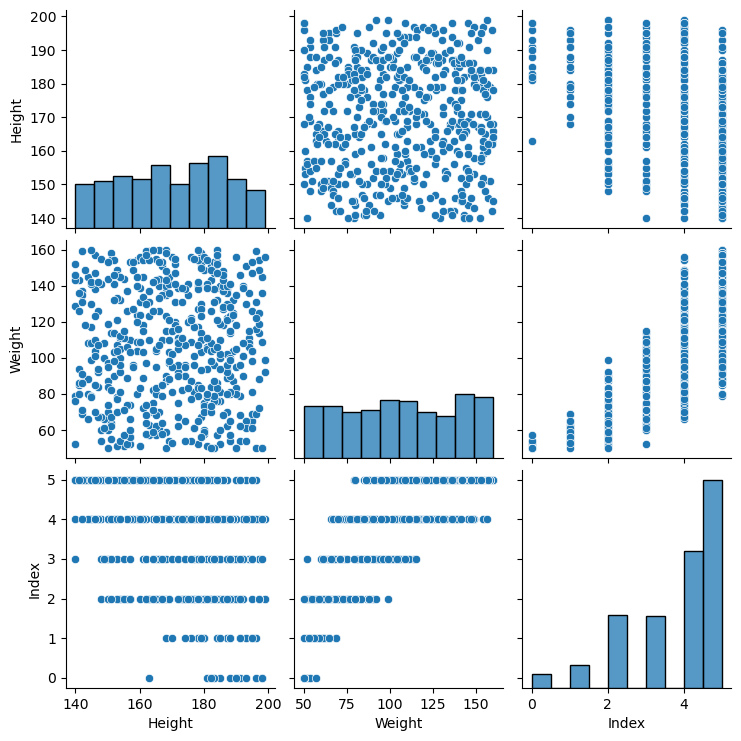

In [16]:
sns.pairplot(bmi)

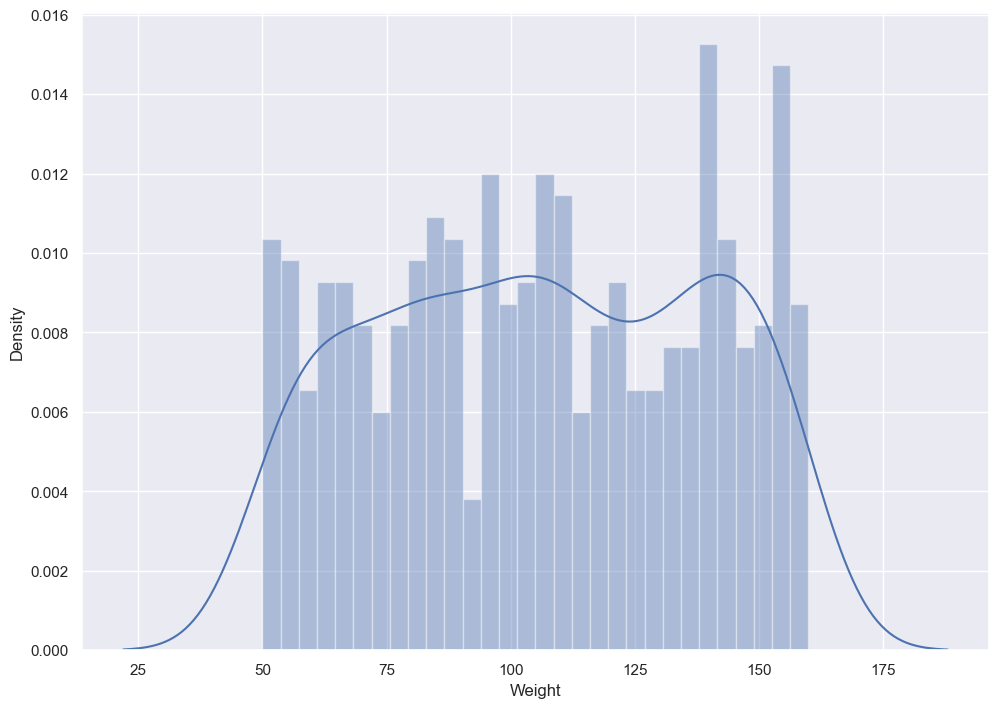

In [20]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(bmi['Weight'],bins=30)
plt.show()

<Axes: >

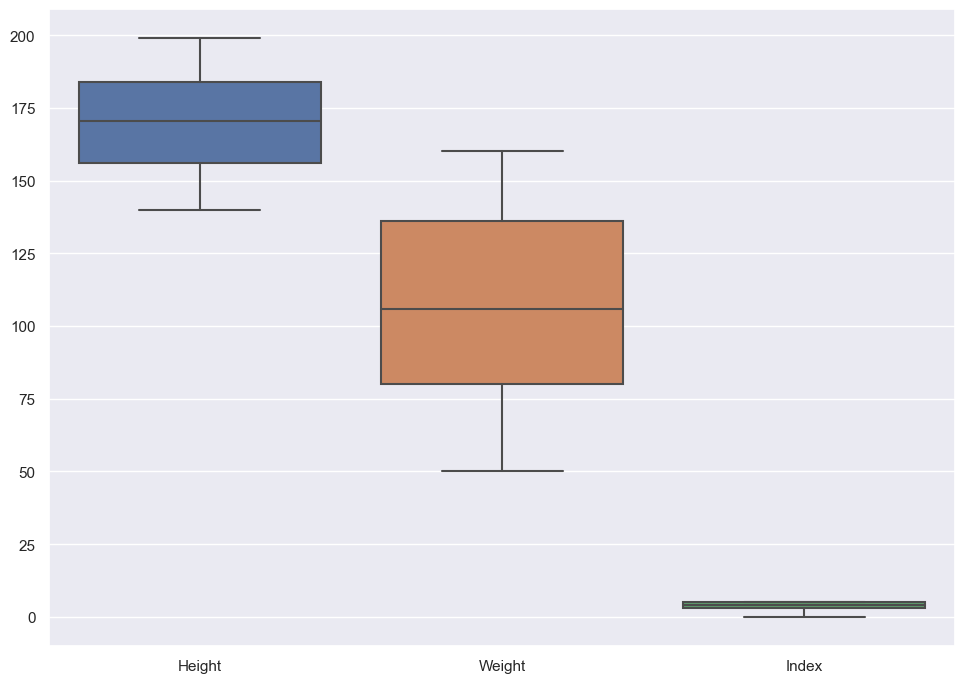

In [21]:
sns.boxplot(bmi)

In [24]:
x=bmi[['Height']]
y=bmi['Weight']

In [26]:

x_train, x_test, y_train, y_test, = train_test_split(x,y,test_size = 0.2, random_state=10)

In [27]:

#linear regression model
model = LinearRegression()

In [28]:
model.fit(x_train,y_train)
model.predict(x_test)

array([104.99845696, 105.11433489, 105.04957957, 105.00186513,
       105.15864115, 105.10411036, 105.11092671, 105.0325387 ,
       105.09388584, 105.02231418, 105.09729401, 105.0325387 ,
       105.10751854, 105.06321227, 105.19272289, 105.13137576,
       105.07002862, 105.13819211, 105.01549783, 105.17227385,
       105.02913053, 105.14841663, 105.09047767, 105.13819211,
       105.00527331, 105.0461714 , 105.15523298, 105.14841663,
       105.14160028, 105.09047767, 105.00527331, 105.00527331,
       105.01890601, 105.11092671, 105.19953924, 105.10070219,
       105.00186513, 105.08366132, 105.10751854, 105.1790902 ,
       105.18590654, 105.09047767, 105.12455941, 105.13137576,
       105.10751854, 105.14500845, 105.18590654, 105.13137576,
       105.12115123, 105.0325387 , 105.07002862, 105.14160028,
       105.12455941, 105.15523298, 105.16204932, 105.01890601,
       105.12796758, 105.0461714 , 105.06321227, 105.13819211,
       105.07002862, 105.00186513, 105.05639592, 105.09

In [30]:
cvs = cross_val_score(model,x, y, scoring = "neg_mean_squared_error",cv=10)
print(cvs)
mean_cvs = np.mean(cvs)
print(mean_cvs)



[ -886.24344063 -1081.95637929 -1271.54620489  -739.44493637
 -1050.93585477 -1084.32110768 -1072.29557853 -1270.82667135
 -1142.7423806   -988.18138165]
-1058.8493935759766


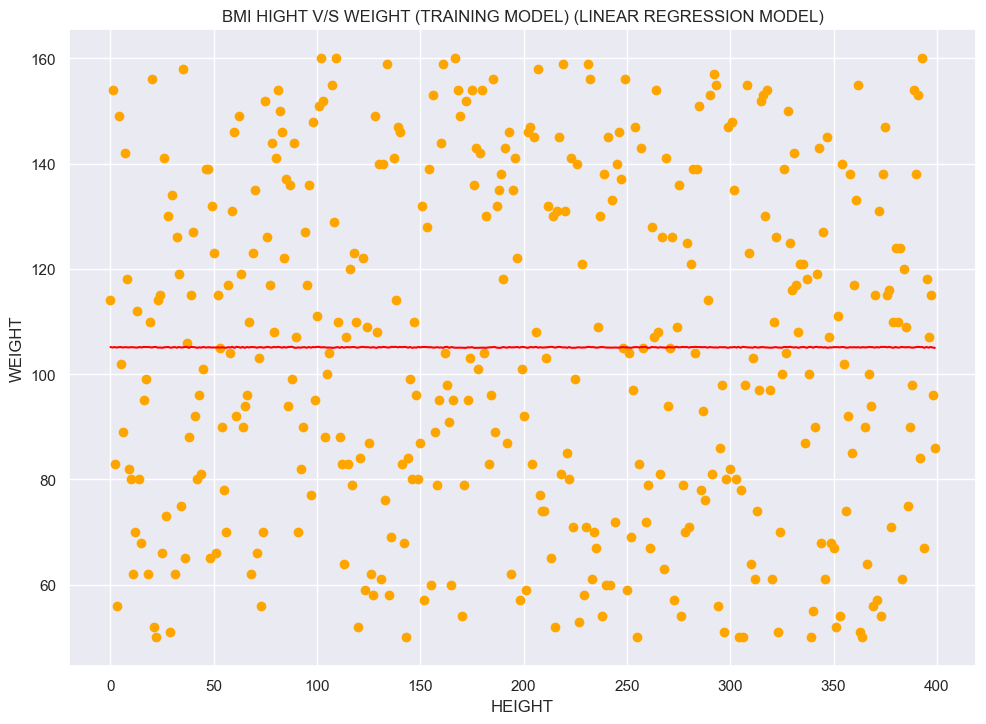

In [31]:
x_train1 = np.arange(0, len(x_train), 1)
plt.scatter(x_train1, y_train, color="orange")
plt.plot(x_train1, model.predict(x_train), color="red")
plt.title("BMI HIGHT V/S WEIGHT (TRAINING MODEL) (LINEAR REGRESSION MODEL)")
plt.xlabel("HEIGHT")
plt.ylabel("WEIGHT")
plt.show()

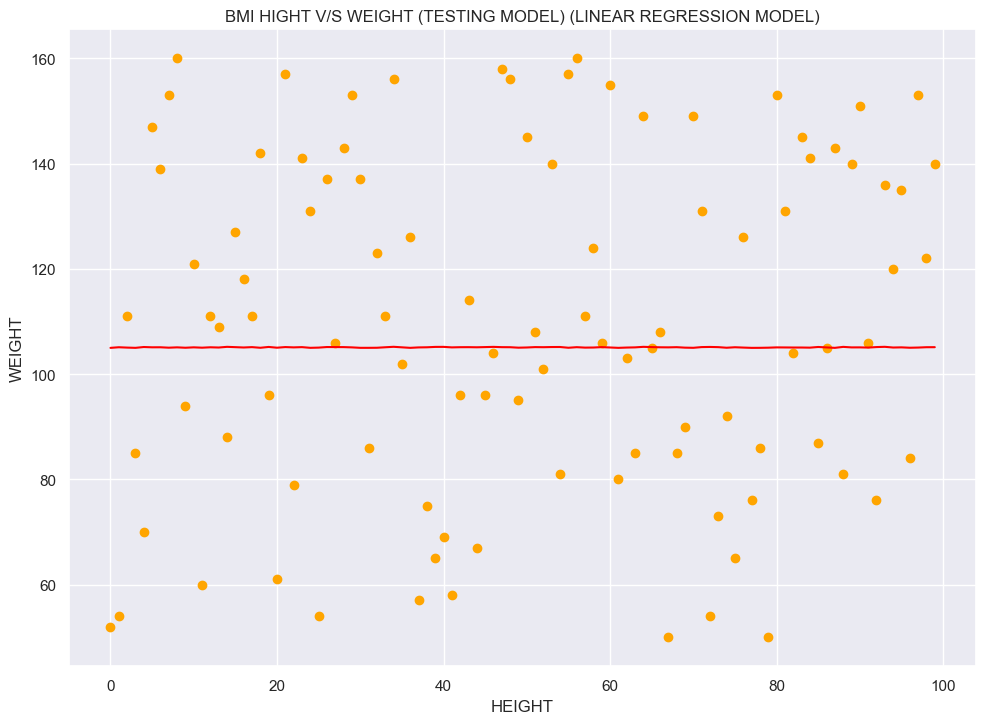

In [32]:
x_test1 = np.arange(0,len(x_test),1)
plt.scatter(x_test1,y_test,color = "orange")
plt.plot(x_test1,model.predict(x_test),color = "red")
plt.title("BMI HIGHT V/S WEIGHT (TESTING MODEL) (LINEAR REGRESSION MODEL)")
plt.xlabel("HEIGHT")
plt.ylabel("WEIGHT")
plt.show()


In [33]:

#ridge model
ridge = Ridge()
params = {"alpha":[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20]}
ridge_model = GridSearchCV(ridge,params,scoring = "neg_mean_squared_error",cv=10)


In [34]:

ridge_model.fit(x_train,y_train)
ridge_model.predict(x_test)

array([104.99847664, 105.11433265, 105.04958958, 105.00188417,
       105.15863053, 105.10411006, 105.11092512, 105.03255193,
       105.09388747, 105.02232934, 105.097295  , 105.03255193,
       105.10751759, 105.0632197 , 105.19270583, 105.1313703 ,
       105.07003476, 105.13818536, 105.01551428, 105.17226065,
       105.0291444 , 105.14840794, 105.09047994, 105.13818536,
       105.0052917 , 105.04618205, 105.155223  , 105.14840794,
       105.14159289, 105.09047994, 105.0052917 , 105.0052917 ,
       105.01892181, 105.11092512, 105.19952089, 105.10070253,
       105.00188417, 105.08366488, 105.10751759, 105.17907571,
       105.18589077, 105.09047994, 105.12455524, 105.1313703 ,
       105.10751759, 105.14500041, 105.18589077, 105.1313703 ,
       105.12114771, 105.03255193, 105.07003476, 105.14159289,
       105.12455524, 105.155223  , 105.16203806, 105.01892181,
       105.12796277, 105.04618205, 105.0632197 , 105.13818536,
       105.07003476, 105.00188417, 105.05640464, 105.09

In [35]:
print(ridge_model.best_params_)
print(ridge_model.best_score_)

{'alpha': 20}
-1062.6919290288818


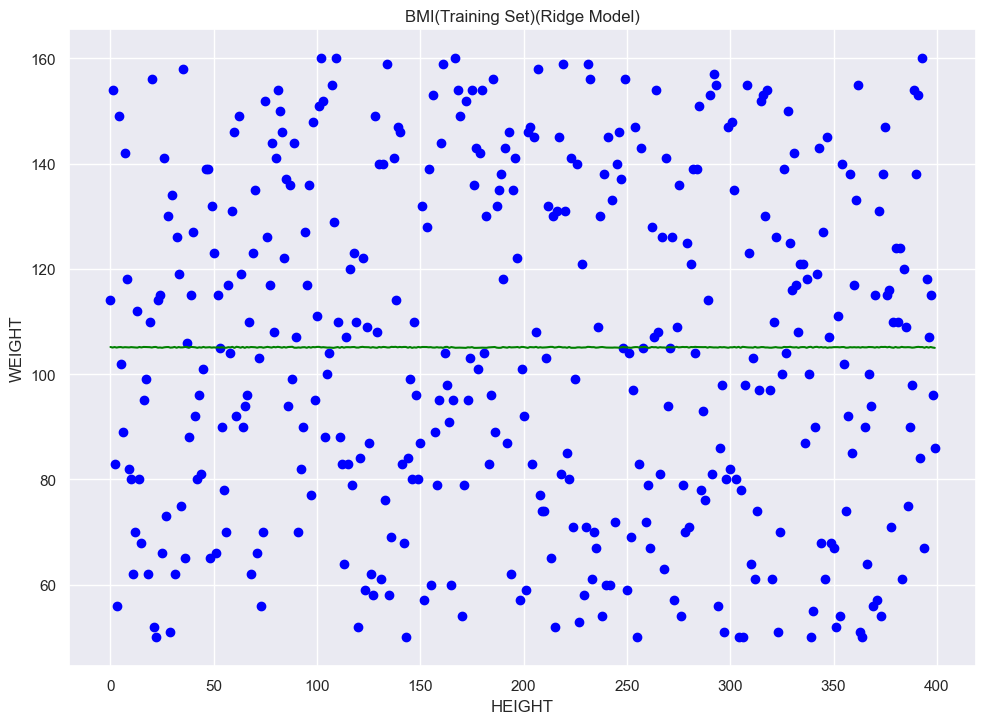

In [36]:

x_train1 = np.arange(0,len(x_train),1)
plt.scatter(x_train1,y_train,color = "blue")
plt.plot(x_train1,ridge_model.predict(x_train),color = "green")
plt.title("BMI(Training Set)(Ridge Model)")
plt.xlabel("HEIGHT")
plt.ylabel("WEIGHT")
plt.show()

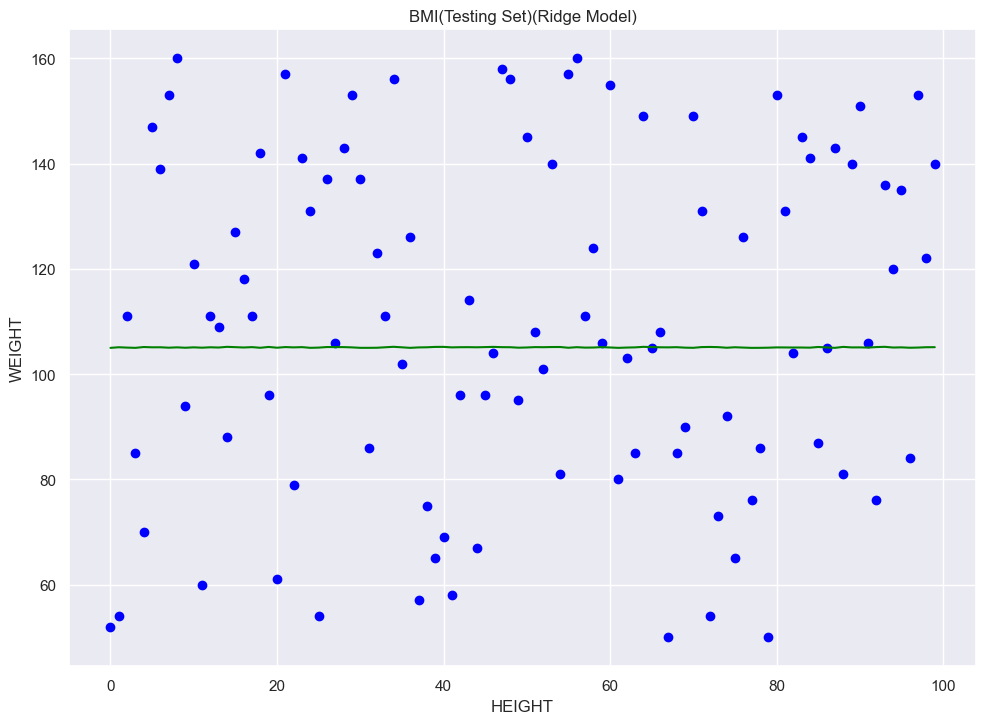

In [37]:
x_test1 = np.arange(0,len(x_test),1)
plt.scatter(x_test1,y_test,color = "blue")
plt.plot(x_test1,ridge_model.predict(x_test),color = "green")
plt.title("BMI(Testing Set)(Ridge Model)")
plt.xlabel("HEIGHT")
plt.ylabel("WEIGHT")
plt.show()

In [38]:
#elastic net model
elastic_net = ElasticNet()
params = {"alpha":[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20]}
Elastic_net_model = GridSearchCV(elastic_net,params,scoring = "neg_mean_squared_error",cv=10)



Elastic_net_model.fit(x_train,y_train)
Elastic_net_model.predict(x_test)


array([105.1025, 105.1025, 105.1025, 105.1025, 105.1025, 105.1025,
       105.1025, 105.1025, 105.1025, 105.1025, 105.1025, 105.1025,
       105.1025, 105.1025, 105.1025, 105.1025, 105.1025, 105.1025,
       105.1025, 105.1025, 105.1025, 105.1025, 105.1025, 105.1025,
       105.1025, 105.1025, 105.1025, 105.1025, 105.1025, 105.1025,
       105.1025, 105.1025, 105.1025, 105.1025, 105.1025, 105.1025,
       105.1025, 105.1025, 105.1025, 105.1025, 105.1025, 105.1025,
       105.1025, 105.1025, 105.1025, 105.1025, 105.1025, 105.1025,
       105.1025, 105.1025, 105.1025, 105.1025, 105.1025, 105.1025,
       105.1025, 105.1025, 105.1025, 105.1025, 105.1025, 105.1025,
       105.1025, 105.1025, 105.1025, 105.1025, 105.1025, 105.1025,
       105.1025, 105.1025, 105.1025, 105.1025, 105.1025, 105.1025,
       105.1025, 105.1025, 105.1025, 105.1025, 105.1025, 105.1025,
       105.1025, 105.1025, 105.1025, 105.1025, 105.1025, 105.1025,
       105.1025, 105.1025, 105.1025, 105.1025, 105.1025, 105.1

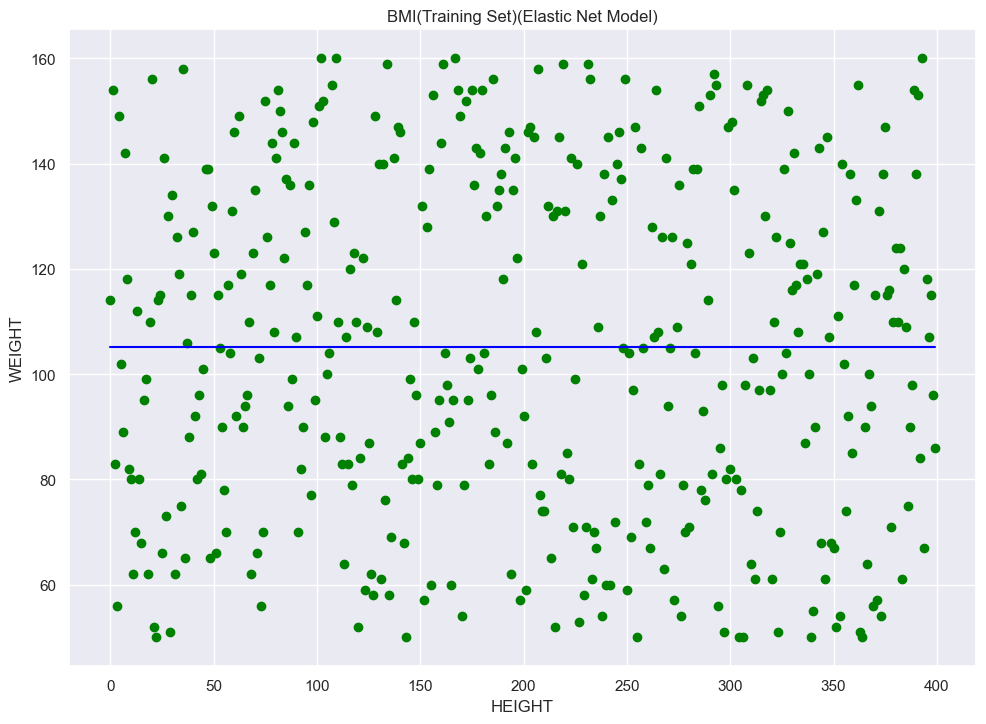

In [39]:
x_train1 = np.arange(0,len(x_train),1)
plt.scatter(x_train1,y_train,color = "green")
plt.plot(x_train1,Elastic_net_model.predict(x_train),color = "blue")
plt.title("BMI(Training Set)(Elastic Net Model)")
plt.xlabel("HEIGHT")
plt.ylabel("WEIGHT")
plt.show()


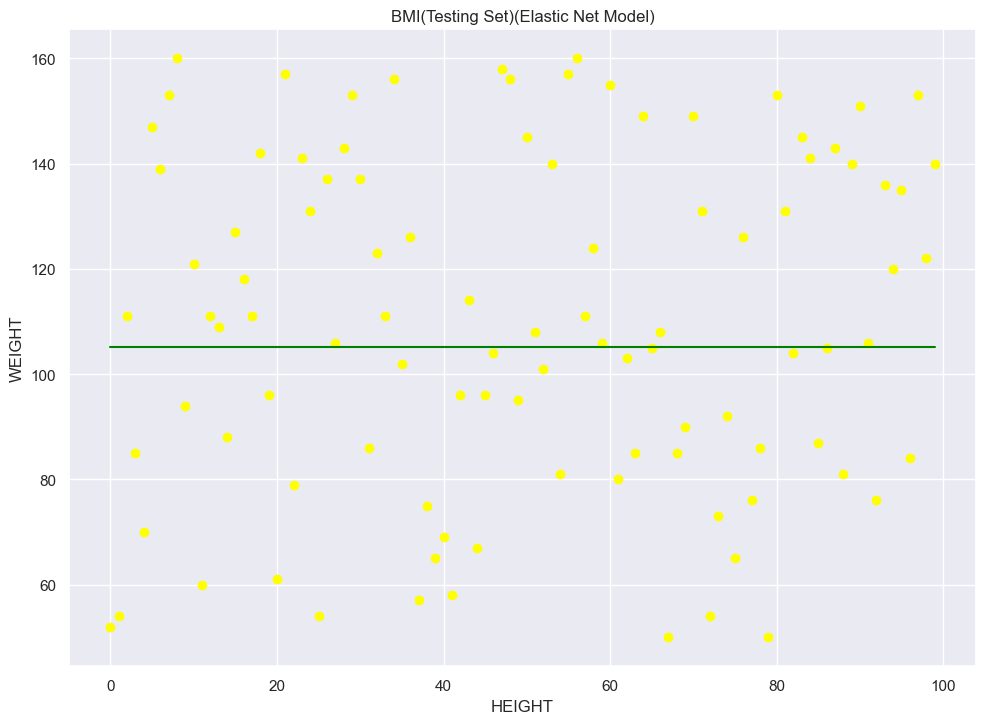

In [40]:
x_test1 = np.arange(0,len(x_test),1)
plt.scatter(x_test1,y_test,color = "yellow")
plt.plot(x_test1,Elastic_net_model.predict(x_test),color = "green")
plt.title("BMI(Testing Set)(Elastic Net Model)")
plt.xlabel("HEIGHT")
plt.ylabel("WEIGHT")
plt.show()
